In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import tensorflow as tf
from time import time
from tensorflow.keras.callbacks import History
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Input
import seaborn as sas

In [2]:
# import dataset and shuffle data
df = pd.read_csv('dataset_2.csv')
df = df.sample(frac=1).reset_index(drop=True)
df['Head Pressure'] = df['Head Pressure'].div(500)
df['Hip Bone Pressure'] = df['Hip Bone Pressure'].div(500)
df['Legs Pressure'] = df['Legs Pressure'].div(500)
df


,Head X,Head Y,Head Pressure,Hip Bone X,Hip Bone Y,Hip Bone Pressure,Legs X,Legs Y,Legs Pressure,Subject,Position
0,15.750000,12.250000,0.823954,13.780952,26.085714,0.162784,20.019802,42.306931,0.075027,3,2
1,22.790123,6.662551,0.010542,17.000000,26.500000,0.783344,7.591743,50.114679,0.006085,12,0
2,16.000000,6.500000,0.142851,13.284091,26.102273,0.494580,15.812500,45.968750,0.338340,6,0
3,14.333333,11.888889,0.362373,19.233010,25.174757,0.118806,7.754505,49.777027,0.006323,5,1
4,18.462687,9.805970,0.080409,17.567416,24.325843,0.213138,13.500000,50.500000,0.599259,2,0
...,...,...,...,...,...,...,...,...,...,...,...
2667,17.800000,4.200000,0.272901,18.319588,27.216495,0.106928,15.500000,63.000000,0.881064,12,0
2668,15.500000,10.794118,0.392191,17.559441,25.223776,0.271124,9.718750,39.937500,0.154462,6,1
2669,17.923077,10.282051,0.204575,18.950820,27.655738,0.307705,8.301688,50.156118,0.012741,10,1
2670,16.588235,7.205882,0.203094,16.142857,25.238095,0.398215,18.037037,47.259259,0.063265,12,2


In [3]:
# Split dataset in train, val and test
num_col = len(df.columns)
train_split = 2400
test_split = 2600

train_data = df.iloc[0:train_split, 0:num_col-2]
val_data = df.iloc[train_split:test_split, 0:num_col-2]

train_subject = df.iloc[0:train_split, num_col-2:num_col-1]
train_position = df.iloc[0:train_split, num_col-1:num_col]
val_subject = df.iloc[train_split:test_split, num_col-2:num_col-1]
val_position = df.iloc[train_split:test_split, num_col-1:num_col]

test_data_p = df.iloc[test_split:,:num_col-2]
test_subject = df.iloc[test_split:, num_col-2:num_col-1]
test_position = df.iloc[test_split:, num_col-1:num_col]

test_data_p = np.array(test_data_p)
test_subject = np.array(test_subject)
test_position = np.array(test_position)

test_subject = to_categorical(test_subject)
test_position = to_categorical(test_position)

while test_subject.shape[1] != 13:
    df = df.sample(frac=1).reset_index(drop=True)
    train_data = df.iloc[0:train_split, 0:num_col-2]
    val_data = df.iloc[train_split:test_split, 0:num_col-2]

    train_subject = df.iloc[0:train_split, num_col-2:num_col-1]
    train_position = df.iloc[0:train_split, num_col-1:num_col]
    val_subject = df.iloc[train_split:test_split, num_col-2:num_col-1]
    val_position = df.iloc[train_split:test_split, num_col-1:num_col]

    test_data_p = df.iloc[test_split:,:num_col-2]
    test_subject = df.iloc[test_split:, num_col-2:num_col-1]
    test_position = df.iloc[test_split:, num_col-1:num_col]

    test_data_p = np.array(test_data_p)
    test_subject = np.array(test_subject)
    test_position = np.array(test_position)
    test_subject = to_categorical(test_subject)
    test_position = to_categorical(test_position)


In [4]:
# convert to numpy array
train_data = np.array(train_data)
val_data = np.array(val_data)

train_subject = np.array(train_subject)
train_position = np.array(train_position)
val_subject = np.array(val_subject)
val_position = np.array(val_position)

print(train_data.shape)
print(train_subject.shape)
print(train_position.shape)
print(val_data.shape)
print(val_subject.shape)
print(val_position.shape)


(2400, 9)
(2400, 1)
(2400, 1)
(200, 9)
(200, 1)
(200, 1)


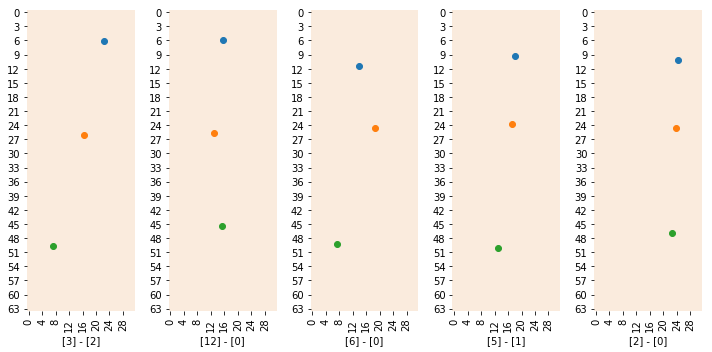

In [5]:
plt.figure(figsize=(10,5))
i = 0

for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    label = str(train_subject[i-1]) + ' - ' + str(train_position[i-1])
    sas.heatmap(np.zeros(2048).reshape(64,32),  vmin=-2, cbar=False)
    plt.plot(train_data[i][0],train_data[i][1], 'o')
    plt.plot(train_data[i][3],train_data[i][4], 'o')
    plt.plot(train_data[i][6],train_data[i][7], 'o')
    plt.xlabel(label)

plt.tight_layout()
    

In [6]:
# normalize data and build categorical labels
train_subject = to_categorical(train_subject, 13)
train_position = to_categorical(train_position, 3)
val_subject = to_categorical(val_subject, 13)
val_position = to_categorical(val_position, 3)


In [7]:
# model implementation
inp = 9

model_position = Sequential()
model_position.add(Dense(64, input_dim= inp, activation='relu'))
model_position.add(Flatten())
model_position.add(Dropout(0.4))
model_position.add(Dense(32, activation='relu'))
model_position.add(Dense(32, activation='relu'))
model_position.add(Dense(16, activation='relu'))
model_position.add(Dense(9, activation='relu'))

model_position.add(Dense(3, activation='softmax'))


In [8]:
optimiser = tf.keras.optimizers.Adam(learning_rate=0.001)

model_position.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['accuracy'])

model_position.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 9)                 1

In [9]:
#train subject model
history = History()

train_position = model_position.fit(train_data, train_position, validation_data = (val_data, val_position), epochs=250,  callbacks = [history])


Train on 2400 samples, validate on 200 samples
Epoch 1/250
2400/2400 [==============================] - 1s 430us/sample - loss: 1.2268 - accuracy: 0.4471 - val_loss: 1.0073 - val_accuracy: 0.5200
Epoch 2/250
2400/2400 [==============================] - 0s 61us/sample - loss: 0.9984 - accuracy: 0.5387 - val_loss: 0.9972 - val_accuracy: 0.5200
Epoch 3/250
2400/2400 [==============================] - 0s 61us/sample - loss: 0.9835 - accuracy: 0.5417 - val_loss: 0.9743 - val_accuracy: 0.5200
Epoch 4/250
2400/2400 [==============================] - 0s 139us/sample - loss: 0.9638 - accuracy: 0.5529 - val_loss: 0.9381 - val_accuracy: 0.5850
Epoch 5/250
2400/2400 [==============================] - 0s 152us/sample - loss: 0.9267 - accuracy: 0.5904 - val_loss: 0.8772 - val_accuracy: 0.6600
Epoch 6/250
2400/2400 [==============================] - 0s 94us/sample - loss: 0.8719 - accuracy: 0.6408 - val_loss: 0.7782 - val_accuracy: 0.7750
Epoch 7/250
2400/2400 [==============================] - 0s 69

2400/2400 [==============================] - 0s 106us/sample - loss: 0.3038 - accuracy: 0.9004 - val_loss: 0.2075 - val_accuracy: 0.9450
Epoch 56/250
2400/2400 [==============================] - 0s 57us/sample - loss: 0.3073 - accuracy: 0.8988 - val_loss: 0.2148 - val_accuracy: 0.9200
Epoch 57/250
2400/2400 [==============================] - 0s 56us/sample - loss: 0.3022 - accuracy: 0.8942 - val_loss: 0.1887 - val_accuracy: 0.9500
Epoch 58/250
2400/2400 [==============================] - 0s 56us/sample - loss: 0.3103 - accuracy: 0.8950 - val_loss: 0.1920 - val_accuracy: 0.9450
Epoch 59/250
2400/2400 [==============================] - 0s 57us/sample - loss: 0.2990 - accuracy: 0.9038 - val_loss: 0.2165 - val_accuracy: 0.9300
Epoch 60/250
2400/2400 [==============================] - 0s 57us/sample - loss: 0.3235 - accuracy: 0.8892 - val_loss: 0.2033 - val_accuracy: 0.9200
Epoch 61/250
2400/2400 [==============================] - 0s 59us/sample - loss: 0.3011 - accuracy: 0.9008 - val_loss:

Epoch 110/250
2400/2400 [==============================] - 0s 92us/sample - loss: 0.2326 - accuracy: 0.9208 - val_loss: 0.1744 - val_accuracy: 0.9300
Epoch 111/250
2400/2400 [==============================] - 0s 90us/sample - loss: 0.2326 - accuracy: 0.9242 - val_loss: 0.1515 - val_accuracy: 0.9550
Epoch 112/250
2400/2400 [==============================] - 0s 77us/sample - loss: 0.2446 - accuracy: 0.9208 - val_loss: 0.1571 - val_accuracy: 0.9400
Epoch 113/250
2400/2400 [==============================] - 0s 67us/sample - loss: 0.2484 - accuracy: 0.9146 - val_loss: 0.1439 - val_accuracy: 0.9400
Epoch 114/250
2400/2400 [==============================] - 0s 58us/sample - loss: 0.2560 - accuracy: 0.9179 - val_loss: 0.1727 - val_accuracy: 0.9400
Epoch 115/250
2400/2400 [==============================] - 0s 57us/sample - loss: 0.2396 - accuracy: 0.9196 - val_loss: 0.1658 - val_accuracy: 0.9300
Epoch 116/250
2400/2400 [==============================] - 0s 57us/sample - loss: 0.2385 - accuracy:

2400/2400 [==============================] - 0s 56us/sample - loss: 0.2318 - accuracy: 0.9229 - val_loss: 0.1231 - val_accuracy: 0.9650
Epoch 165/250
2400/2400 [==============================] - 0s 56us/sample - loss: 0.2165 - accuracy: 0.9283 - val_loss: 0.1481 - val_accuracy: 0.9450
Epoch 166/250
2400/2400 [==============================] - 0s 55us/sample - loss: 0.2153 - accuracy: 0.9262 - val_loss: 0.1434 - val_accuracy: 0.9600
Epoch 167/250
2400/2400 [==============================] - 0s 56us/sample - loss: 0.2184 - accuracy: 0.9275 - val_loss: 0.1459 - val_accuracy: 0.9450
Epoch 168/250
2400/2400 [==============================] - 0s 55us/sample - loss: 0.1990 - accuracy: 0.9350 - val_loss: 0.2203 - val_accuracy: 0.9200
Epoch 169/250
2400/2400 [==============================] - 0s 56us/sample - loss: 0.2258 - accuracy: 0.9225 - val_loss: 0.1391 - val_accuracy: 0.9600
Epoch 170/250
2400/2400 [==============================] - 0s 55us/sample - loss: 0.2147 - accuracy: 0.9296 - val_

Epoch 219/250
2400/2400 [==============================] - 0s 57us/sample - loss: 0.1974 - accuracy: 0.9317 - val_loss: 0.1600 - val_accuracy: 0.9400
Epoch 220/250
2400/2400 [==============================] - 0s 55us/sample - loss: 0.2080 - accuracy: 0.9271 - val_loss: 0.1403 - val_accuracy: 0.9450
Epoch 221/250
2400/2400 [==============================] - 0s 56us/sample - loss: 0.2113 - accuracy: 0.9271 - val_loss: 0.1284 - val_accuracy: 0.9650
Epoch 222/250
2400/2400 [==============================] - 0s 56us/sample - loss: 0.1923 - accuracy: 0.9358 - val_loss: 0.1165 - val_accuracy: 0.9700
Epoch 223/250
2400/2400 [==============================] - 0s 55us/sample - loss: 0.2098 - accuracy: 0.9321 - val_loss: 0.1310 - val_accuracy: 0.9600
Epoch 224/250
2400/2400 [==============================] - 0s 55us/sample - loss: 0.2027 - accuracy: 0.9308 - val_loss: 0.1269 - val_accuracy: 0.9700
Epoch 225/250
2400/2400 [==============================] - 0s 55us/sample - loss: 0.2052 - accuracy:

72/72 [==============================] - 0s 86us/sample - loss: 0.1797 - accuracy: 0.9861
[0 0 1 1 1 0 0 0 0 0]


,Position
2600,0
2601,0
2602,1
2603,1
2604,1
2605,2
2606,0
2607,0
2608,0
2609,0


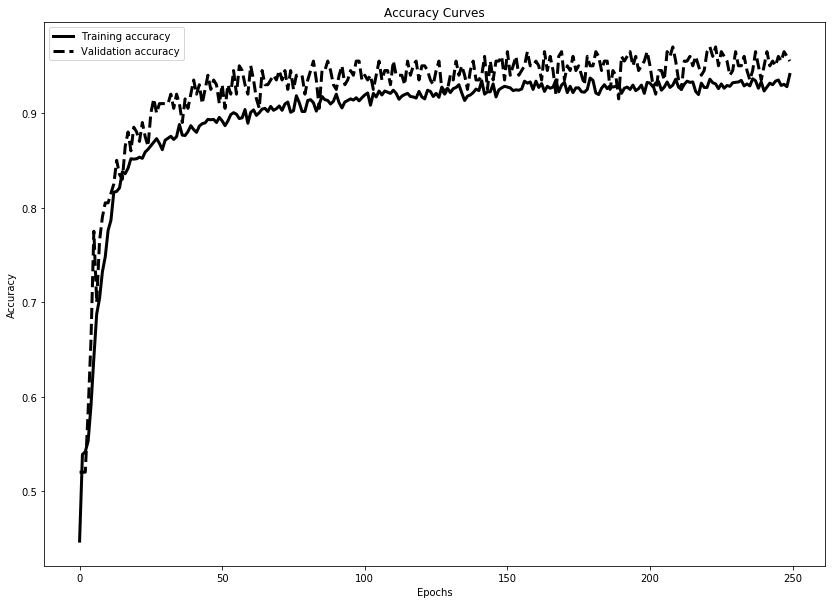

In [10]:
plt.figure(figsize = (14,10))
plt.plot(history.history['accuracy'],'black', linewidth = 3.0,  label = "Training accuracy")
plt.plot(history.history['val_accuracy'],'black', ls = "--",linewidth = 3.0, label = "Validation accuracy")
plt.legend(loc="upper left")
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')


model_position.evaluate(test_data_p, test_position)

predictions_position = model_position.predict(test_data_p)
predictions_position = predictions_position.argmax(axis=-1)
print(predictions_position[:10])

test_labels = df.iloc[test_split:, num_col-1:num_col]
test_labels.head(10)


In [11]:
# Split dataset in train, val and test
num_col = len(df.columns)
train_split = 2400
test_split = 2600

train_data = df.iloc[0:train_split, [2,5,8]]
val_data = df.iloc[train_split:test_split, [2,5,8]]

train_subject = df.iloc[0:train_split, num_col-2:num_col-1]
train_position = df.iloc[0:train_split, num_col-1:num_col]
val_subject = df.iloc[train_split:test_split, num_col-2:num_col-1]
val_position = df.iloc[train_split:test_split, num_col-1:num_col]

test_data_s = df.iloc[test_split:,[2,5,8]]
test_subject = df.iloc[test_split:, num_col-2:num_col-1]
test_position = df.iloc[test_split:, num_col-1:num_col]

test_data_s = np.array(test_data_s)
test_subject = np.array(test_subject)
test_position = np.array(test_position)
test_subject = to_categorical(test_subject)
test_position = to_categorical(test_position)

while test_subject.shape[1] != 13:
    df = df.sample(frac=1).reset_index(drop=True)
    train_data = df.iloc[0:train_split, [2,5,8]]
    val_data = df.iloc[train_split:test_split, [2,5,8]]

    train_subject = df.iloc[0:train_split, num_col-2:num_col-1]
    train_position = df.iloc[0:train_split, num_col-1:num_col]
    val_subject = df.iloc[train_split:test_split, num_col-2:num_col-1]
    val_position = df.iloc[train_split:test_split, num_col-1:num_col]

    test_data_s = df.iloc[test_split:,[2,5,8]]
    test_subject = df.iloc[test_split:, num_col-2:num_col-1]
    test_position = df.iloc[test_split:, num_col-1:num_col]

    test_data_s = np.array(test_data_s)
    test_subject = np.array(test_subject)
    test_position = np.array(test_position)
    test_subject = to_categorical(test_subject)
    test_position = to_categorical(test_position)
    

In [12]:
# convert to numpy array
train_data = np.array(train_data)
val_data = np.array(val_data)

train_subject = np.array(train_subject)
train_position = np.array(train_position)
val_subject = np.array(val_subject)
val_position = np.array(val_position)

print(train_subject.shape)
print(train_position.shape)
print(val_data.shape)
print(val_subject.shape)
print(val_position.shape)


(2400, 1)
(2400, 1)
(200, 3)
(200, 1)
(200, 1)


In [13]:
# normalize data and build categorical labels
train_subject = to_categorical(train_subject, 13)
train_position = to_categorical(train_position, 3)
val_subject = to_categorical(val_subject, 13)
val_position = to_categorical(val_position, 3)


In [14]:
# model subject
model_subject = Sequential()
model_subject.add(Dense(128, input_dim= 3, activation='relu'))
model_subject.add(Flatten())
model_subject.add(Dropout(0.4))
model_subject.add(Dense(64, activation='relu'))
model_subject.add(Dense(32, activation='relu'))
model_subject.add(Dense(32, activation='relu'))
model_subject.add(Dense(16, activation='relu'))
model_subject.add(Dense(9, activation='relu'))

model_subject.add(Dense(13, activation='softmax'))


In [15]:
optimiser = tf.keras.optimizers.Adam(learning_rate=0.001)

model_subject.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['accuracy'])

model_subject.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               512       
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_10 (Dense)             (None, 16)               

In [16]:
#train position model
history = History()

train_subject = model_subject.fit(train_data, train_subject, validation_data = (val_data, val_subject), epochs=800, batch_size = 8, callbacks = [history])


Train on 2400 samples, validate on 200 samples
Epoch 1/800
2400/2400 [==============================] - 1s 440us/sample - loss: 2.5602 - accuracy: 0.0900 - val_loss: 2.5518 - val_accuracy: 0.1050
Epoch 2/800
2400/2400 [==============================] - 1s 225us/sample - loss: 2.5344 - accuracy: 0.1146 - val_loss: 2.5242 - val_accuracy: 0.1150
Epoch 3/800
2400/2400 [==============================] - 1s 224us/sample - loss: 2.5035 - accuracy: 0.1167 - val_loss: 2.5201 - val_accuracy: 0.1300
Epoch 4/800
2400/2400 [==============================] - 1s 222us/sample - loss: 2.4763 - accuracy: 0.1267 - val_loss: 2.4925 - val_accuracy: 0.1000
Epoch 5/800
2400/2400 [==============================] - 1s 224us/sample - loss: 2.4608 - accuracy: 0.1246 - val_loss: 2.4955 - val_accuracy: 0.0750
Epoch 6/800
2400/2400 [==============================] - 1s 229us/sample - loss: 2.4433 - accuracy: 0.1346 - val_loss: 2.4851 - val_accuracy: 0.1200
Epoch 7/800
2400/2400 [==============================] - 1s

2400/2400 [==============================] - 1s 440us/sample - loss: 1.9452 - accuracy: 0.3204 - val_loss: 2.0338 - val_accuracy: 0.2750
Epoch 56/800
2400/2400 [==============================] - 1s 386us/sample - loss: 1.9583 - accuracy: 0.3092 - val_loss: 2.1119 - val_accuracy: 0.2400
Epoch 57/800
2400/2400 [==============================] - 1s 391us/sample - loss: 1.9520 - accuracy: 0.3200 - val_loss: 2.0563 - val_accuracy: 0.2800
Epoch 58/800
2400/2400 [==============================] - 1s 399us/sample - loss: 1.9526 - accuracy: 0.3121 - val_loss: 2.0221 - val_accuracy: 0.2650
Epoch 59/800
2400/2400 [==============================] - 1s 443us/sample - loss: 1.9261 - accuracy: 0.3158 - val_loss: 2.0307 - val_accuracy: 0.2600
Epoch 60/800
2400/2400 [==============================] - 1s 326us/sample - loss: 1.9274 - accuracy: 0.3292 - val_loss: 2.0149 - val_accuracy: 0.2400
Epoch 61/800
2400/2400 [==============================] - 1s 395us/sample - loss: 1.9115 - accuracy: 0.3221 - val

2400/2400 [==============================] - 1s 258us/sample - loss: 1.6434 - accuracy: 0.4333 - val_loss: 1.7460 - val_accuracy: 0.4800
Epoch 110/800
2400/2400 [==============================] - 1s 247us/sample - loss: 1.6080 - accuracy: 0.4550 - val_loss: 1.7548 - val_accuracy: 0.4450
Epoch 111/800
2400/2400 [==============================] - 1s 237us/sample - loss: 1.6399 - accuracy: 0.4371 - val_loss: 1.7380 - val_accuracy: 0.4600
Epoch 112/800
2400/2400 [==============================] - 1s 235us/sample - loss: 1.6289 - accuracy: 0.4358 - val_loss: 1.7114 - val_accuracy: 0.4550
Epoch 113/800
2400/2400 [==============================] - 1s 268us/sample - loss: 1.6274 - accuracy: 0.4387 - val_loss: 1.6999 - val_accuracy: 0.4750
Epoch 114/800
2400/2400 [==============================] - 1s 253us/sample - loss: 1.5998 - accuracy: 0.4542 - val_loss: 1.6720 - val_accuracy: 0.4450
Epoch 115/800
2400/2400 [==============================] - 1s 245us/sample - loss: 1.5955 - accuracy: 0.4554

2400/2400 [==============================] - 1s 261us/sample - loss: 1.4643 - accuracy: 0.5025 - val_loss: 1.4836 - val_accuracy: 0.5250
Epoch 164/800
2400/2400 [==============================] - 1s 234us/sample - loss: 1.4807 - accuracy: 0.4917 - val_loss: 1.4745 - val_accuracy: 0.5300
Epoch 165/800
2400/2400 [==============================] - 1s 234us/sample - loss: 1.4516 - accuracy: 0.5017 - val_loss: 1.6025 - val_accuracy: 0.4650
Epoch 166/800
2400/2400 [==============================] - 1s 245us/sample - loss: 1.4652 - accuracy: 0.5017 - val_loss: 1.5095 - val_accuracy: 0.5100
Epoch 167/800
2400/2400 [==============================] - 1s 230us/sample - loss: 1.4828 - accuracy: 0.4779 - val_loss: 1.5439 - val_accuracy: 0.5150
Epoch 168/800
2400/2400 [==============================] - 1s 227us/sample - loss: 1.4639 - accuracy: 0.5021 - val_loss: 1.5324 - val_accuracy: 0.4900
Epoch 169/800
2400/2400 [==============================] - 1s 242us/sample - loss: 1.4592 - accuracy: 0.5117

2400/2400 [==============================] - 1s 247us/sample - loss: 1.3770 - accuracy: 0.5350 - val_loss: 1.3864 - val_accuracy: 0.5450
Epoch 218/800
2400/2400 [==============================] - 1s 261us/sample - loss: 1.3574 - accuracy: 0.5392 - val_loss: 1.4074 - val_accuracy: 0.5850
Epoch 219/800
2400/2400 [==============================] - 1s 230us/sample - loss: 1.3515 - accuracy: 0.5446 - val_loss: 1.4094 - val_accuracy: 0.5750
Epoch 220/800
2400/2400 [==============================] - 1s 237us/sample - loss: 1.3627 - accuracy: 0.5450 - val_loss: 1.3976 - val_accuracy: 0.5700
Epoch 221/800
2400/2400 [==============================] - 1s 249us/sample - loss: 1.3677 - accuracy: 0.5317 - val_loss: 1.3743 - val_accuracy: 0.5800
Epoch 222/800
2400/2400 [==============================] - 1s 511us/sample - loss: 1.3220 - accuracy: 0.5546 - val_loss: 1.3676 - val_accuracy: 0.5750
Epoch 223/800
2400/2400 [==============================] - 1s 268us/sample - loss: 1.3460 - accuracy: 0.5375

2400/2400 [==============================] - 1s 221us/sample - loss: 1.2561 - accuracy: 0.5804 - val_loss: 1.3512 - val_accuracy: 0.5700
Epoch 272/800
2400/2400 [==============================] - 1s 217us/sample - loss: 1.2965 - accuracy: 0.5621 - val_loss: 1.3110 - val_accuracy: 0.6400
Epoch 273/800
2400/2400 [==============================] - 1s 221us/sample - loss: 1.2913 - accuracy: 0.5683 - val_loss: 1.2747 - val_accuracy: 0.6300
Epoch 274/800
2400/2400 [==============================] - 1s 232us/sample - loss: 1.2597 - accuracy: 0.5813 - val_loss: 1.3115 - val_accuracy: 0.6100
Epoch 275/800
2400/2400 [==============================] - 1s 227us/sample - loss: 1.2501 - accuracy: 0.5808 - val_loss: 1.3946 - val_accuracy: 0.5500
Epoch 276/800
2400/2400 [==============================] - 1s 220us/sample - loss: 1.2646 - accuracy: 0.5725 - val_loss: 1.3979 - val_accuracy: 0.5950
Epoch 277/800
2400/2400 [==============================] - 1s 219us/sample - loss: 1.2682 - accuracy: 0.5875

2400/2400 [==============================] - 1s 241us/sample - loss: 1.2627 - accuracy: 0.5875 - val_loss: 1.2803 - val_accuracy: 0.6200
Epoch 326/800
2400/2400 [==============================] - 1s 220us/sample - loss: 1.2288 - accuracy: 0.5888 - val_loss: 1.2434 - val_accuracy: 0.6600
Epoch 327/800
2400/2400 [==============================] - 1s 224us/sample - loss: 1.2070 - accuracy: 0.5925 - val_loss: 1.2999 - val_accuracy: 0.6550
Epoch 328/800
2400/2400 [==============================] - 1s 223us/sample - loss: 1.1961 - accuracy: 0.6087 - val_loss: 1.2573 - val_accuracy: 0.6500
Epoch 329/800
2400/2400 [==============================] - 1s 232us/sample - loss: 1.1847 - accuracy: 0.6017 - val_loss: 1.3377 - val_accuracy: 0.6350
Epoch 330/800
2400/2400 [==============================] - 1s 225us/sample - loss: 1.2085 - accuracy: 0.5908 - val_loss: 1.2349 - val_accuracy: 0.6400
Epoch 331/800
2400/2400 [==============================] - 1s 230us/sample - loss: 1.2206 - accuracy: 0.5979

2400/2400 [==============================] - 1s 221us/sample - loss: 1.1595 - accuracy: 0.6233 - val_loss: 1.2370 - val_accuracy: 0.6650
Epoch 380/800
2400/2400 [==============================] - 1s 218us/sample - loss: 1.1802 - accuracy: 0.6046 - val_loss: 1.2441 - val_accuracy: 0.6550
Epoch 381/800
2400/2400 [==============================] - 1s 219us/sample - loss: 1.1956 - accuracy: 0.6129 - val_loss: 1.2756 - val_accuracy: 0.6700
Epoch 382/800
2400/2400 [==============================] - 1s 215us/sample - loss: 1.1809 - accuracy: 0.6058 - val_loss: 1.2294 - val_accuracy: 0.6700
Epoch 383/800
2400/2400 [==============================] - 1s 221us/sample - loss: 1.1266 - accuracy: 0.6338 - val_loss: 1.2737 - val_accuracy: 0.6600
Epoch 384/800
2400/2400 [==============================] - 1s 218us/sample - loss: 1.1665 - accuracy: 0.6175 - val_loss: 1.3042 - val_accuracy: 0.6350
Epoch 385/800
2400/2400 [==============================] - 1s 219us/sample - loss: 1.1544 - accuracy: 0.6150

2400/2400 [==============================] - 1s 234us/sample - loss: 1.1543 - accuracy: 0.6233 - val_loss: 1.2205 - val_accuracy: 0.6700
Epoch 434/800
2400/2400 [==============================] - 1s 229us/sample - loss: 1.1095 - accuracy: 0.6404 - val_loss: 1.2114 - val_accuracy: 0.6650
Epoch 435/800
2400/2400 [==============================] - 1s 231us/sample - loss: 1.1310 - accuracy: 0.6308 - val_loss: 1.2083 - val_accuracy: 0.7300
Epoch 436/800
2400/2400 [==============================] - 1s 222us/sample - loss: 1.1039 - accuracy: 0.6475 - val_loss: 1.3097 - val_accuracy: 0.6450
Epoch 437/800
2400/2400 [==============================] - 1s 248us/sample - loss: 1.1134 - accuracy: 0.6350 - val_loss: 1.2236 - val_accuracy: 0.6500
Epoch 438/800
2400/2400 [==============================] - 1s 249us/sample - loss: 1.1191 - accuracy: 0.6296 - val_loss: 1.2223 - val_accuracy: 0.6450
Epoch 439/800
2400/2400 [==============================] - 1s 269us/sample - loss: 1.0945 - accuracy: 0.6383

2400/2400 [==============================] - 1s 218us/sample - loss: 1.0761 - accuracy: 0.6475 - val_loss: 1.2501 - val_accuracy: 0.6600
Epoch 488/800
2400/2400 [==============================] - 1s 220us/sample - loss: 1.0827 - accuracy: 0.6521 - val_loss: 1.2375 - val_accuracy: 0.6700
Epoch 489/800
2400/2400 [==============================] - 1s 217us/sample - loss: 1.0421 - accuracy: 0.6612 - val_loss: 1.1643 - val_accuracy: 0.6800
Epoch 490/800
2400/2400 [==============================] - 1s 219us/sample - loss: 1.0755 - accuracy: 0.6367 - val_loss: 1.1752 - val_accuracy: 0.6700
Epoch 491/800
2400/2400 [==============================] - 1s 220us/sample - loss: 1.0615 - accuracy: 0.6562 - val_loss: 1.1989 - val_accuracy: 0.6800
Epoch 492/800
2400/2400 [==============================] - 1s 217us/sample - loss: 1.0612 - accuracy: 0.6471 - val_loss: 1.2024 - val_accuracy: 0.6950
Epoch 493/800
2400/2400 [==============================] - 1s 217us/sample - loss: 1.1180 - accuracy: 0.6513

2400/2400 [==============================] - 1s 230us/sample - loss: 1.0470 - accuracy: 0.6546 - val_loss: 1.1436 - val_accuracy: 0.6950
Epoch 542/800
2400/2400 [==============================] - 1s 219us/sample - loss: 1.0290 - accuracy: 0.6538 - val_loss: 1.1721 - val_accuracy: 0.6900
Epoch 543/800
2400/2400 [==============================] - 1s 217us/sample - loss: 1.0240 - accuracy: 0.6500 - val_loss: 1.1528 - val_accuracy: 0.7050
Epoch 544/800
2400/2400 [==============================] - 1s 220us/sample - loss: 1.0420 - accuracy: 0.6642 - val_loss: 1.2024 - val_accuracy: 0.6850
Epoch 545/800
2400/2400 [==============================] - 1s 225us/sample - loss: 1.0364 - accuracy: 0.6592 - val_loss: 1.1386 - val_accuracy: 0.7150
Epoch 546/800
2400/2400 [==============================] - 1s 218us/sample - loss: 1.0782 - accuracy: 0.6558 - val_loss: 1.1523 - val_accuracy: 0.6800
Epoch 547/800
2400/2400 [==============================] - 1s 222us/sample - loss: 1.0573 - accuracy: 0.6629

2400/2400 [==============================] - 1s 304us/sample - loss: 1.0026 - accuracy: 0.6742 - val_loss: 1.0449 - val_accuracy: 0.7100
Epoch 596/800
2400/2400 [==============================] - 1s 280us/sample - loss: 0.9952 - accuracy: 0.6696 - val_loss: 1.0898 - val_accuracy: 0.7150
Epoch 597/800
2400/2400 [==============================] - 1s 264us/sample - loss: 1.0128 - accuracy: 0.6808 - val_loss: 1.1285 - val_accuracy: 0.6950
Epoch 598/800
2400/2400 [==============================] - 1s 264us/sample - loss: 1.0161 - accuracy: 0.6692 - val_loss: 1.1096 - val_accuracy: 0.7000
Epoch 599/800
2400/2400 [==============================] - 1s 267us/sample - loss: 1.0007 - accuracy: 0.6725 - val_loss: 1.0837 - val_accuracy: 0.6950
Epoch 600/800
2400/2400 [==============================] - 1s 269us/sample - loss: 0.9937 - accuracy: 0.6700 - val_loss: 1.0755 - val_accuracy: 0.7100
Epoch 601/800
2400/2400 [==============================] - 1s 258us/sample - loss: 1.0311 - accuracy: 0.6621

2400/2400 [==============================] - 1s 211us/sample - loss: 0.9942 - accuracy: 0.6837 - val_loss: 1.0754 - val_accuracy: 0.7200
Epoch 650/800
2400/2400 [==============================] - 1s 213us/sample - loss: 0.9679 - accuracy: 0.6779 - val_loss: 1.1003 - val_accuracy: 0.7050
Epoch 651/800
2400/2400 [==============================] - 0s 205us/sample - loss: 1.0090 - accuracy: 0.6687 - val_loss: 1.0999 - val_accuracy: 0.7500
Epoch 652/800
2400/2400 [==============================] - 1s 212us/sample - loss: 0.9900 - accuracy: 0.6792 - val_loss: 1.1159 - val_accuracy: 0.7050
Epoch 653/800
2400/2400 [==============================] - 1s 213us/sample - loss: 1.0166 - accuracy: 0.6737 - val_loss: 1.0857 - val_accuracy: 0.6950
Epoch 654/800
2400/2400 [==============================] - 1s 249us/sample - loss: 0.9580 - accuracy: 0.6929 - val_loss: 1.1841 - val_accuracy: 0.7050
Epoch 655/800
2400/2400 [==============================] - 1s 210us/sample - loss: 1.0289 - accuracy: 0.6625

2400/2400 [==============================] - 1s 290us/sample - loss: 0.9858 - accuracy: 0.6800 - val_loss: 1.0448 - val_accuracy: 0.7200
Epoch 704/800
2400/2400 [==============================] - 1s 279us/sample - loss: 0.9590 - accuracy: 0.6808 - val_loss: 1.0517 - val_accuracy: 0.7300
Epoch 705/800
2400/2400 [==============================] - 1s 222us/sample - loss: 0.9695 - accuracy: 0.6867 - val_loss: 1.0737 - val_accuracy: 0.7200
Epoch 706/800
2400/2400 [==============================] - 1s 218us/sample - loss: 0.9634 - accuracy: 0.6779 - val_loss: 1.0441 - val_accuracy: 0.7000
Epoch 707/800
2400/2400 [==============================] - 1s 240us/sample - loss: 0.9709 - accuracy: 0.6829 - val_loss: 1.0999 - val_accuracy: 0.7150
Epoch 708/800
2400/2400 [==============================] - 1s 226us/sample - loss: 0.9656 - accuracy: 0.6867 - val_loss: 1.1078 - val_accuracy: 0.7300
Epoch 709/800
2400/2400 [==============================] - 1s 224us/sample - loss: 0.9663 - accuracy: 0.6900

2400/2400 [==============================] - 1s 220us/sample - loss: 0.9737 - accuracy: 0.6875 - val_loss: 1.0535 - val_accuracy: 0.7150
Epoch 758/800
2400/2400 [==============================] - 1s 220us/sample - loss: 0.9412 - accuracy: 0.6992 - val_loss: 1.1067 - val_accuracy: 0.7050
Epoch 759/800
2400/2400 [==============================] - 1s 341us/sample - loss: 0.9748 - accuracy: 0.6750 - val_loss: 1.0211 - val_accuracy: 0.7800
Epoch 760/800
2400/2400 [==============================] - 1s 326us/sample - loss: 0.9575 - accuracy: 0.6829 - val_loss: 1.0717 - val_accuracy: 0.7250
Epoch 761/800
2400/2400 [==============================] - 1s 257us/sample - loss: 0.9413 - accuracy: 0.6900 - val_loss: 1.0890 - val_accuracy: 0.7100
Epoch 762/800
2400/2400 [==============================] - 1s 220us/sample - loss: 0.9449 - accuracy: 0.6875 - val_loss: 1.0720 - val_accuracy: 0.7150
Epoch 763/800
2400/2400 [==============================] - 1s 217us/sample - loss: 0.9272 - accuracy: 0.6975

72/72 [==============================] - 0s 2ms/sample - loss: 0.8052 - accuracy: 0.7639
[ 5  8 11  7  0  0  5  9  4 10]


,Subject
2600,5
2601,8
2602,11
2603,2
2604,0
2605,0
2606,5
2607,9
2608,6
2609,10


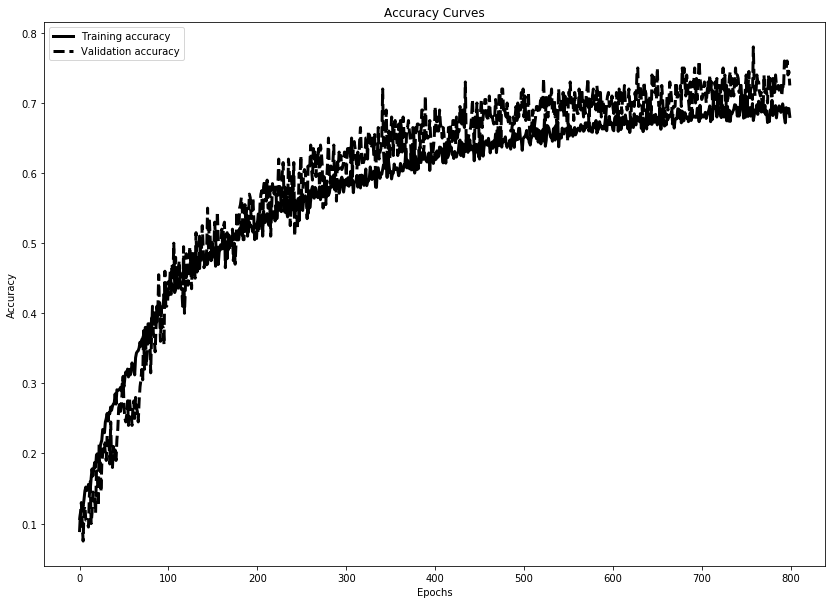

In [17]:
plt.figure(figsize = (14,10))
plt.plot(history.history['accuracy'],'black', linewidth = 3.0,  label = "Training accuracy")
plt.plot(history.history['val_accuracy'],'black', ls = "--",linewidth = 3.0, label = "Validation accuracy")
plt.legend(loc="upper left")
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

model_subject.evaluate(test_data_s, test_subject)

predictions_subject = model_subject.predict(test_data_s)
predictions_subject = predictions_subject.argmax(axis=-1)
print(predictions_subject[:10])

test_labels = df.iloc[test_split:, num_col-2:num_col-1]
test_labels.head(10)


In [18]:
#save model and architecture to single file
model_subject.save("model_subject_2.h5")
model_position.save("model_position_2.h5")

with open('test_2.pkl', 'wb') as f: 
    pickle.dump([test_data_s, test_data_p, test_subject, test_position], f)
    